# Predictive and Non-Predictive Factors
Non-predictive = rank stocks on the basis of their performance in the last 10 days

Predictive = rank stocks on the basis of their performance in the next 5 days

In [1]:
%pylab inline --no-import-all
import yfinance as yf
import alphalens
import pandas as pd
import numpy as np
import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pan = yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2011-05-20", end="2021-05-20")
# tech = data[["Open"]]

[*********************100%***********************]  20 of 20 completed


In [4]:
pricing = pan['Open']

In [5]:
non_predictive_factor = pricing.pct_change(10)

non_predictive_factor = non_predictive_factor.stack()
non_predictive_factor.index = non_predictive_factor.index.set_names(['date', 'asset'])

In [6]:
lookahead_bias_days = 5

predictive_factor = pricing.pct_change(lookahead_bias_days)
# introduce look-ahead bias and make the factor predictive
predictive_factor = predictive_factor.shift(-lookahead_bias_days)

predictive_factor = predictive_factor.stack()
predictive_factor.index = predictive_factor.index.set_names(['date', 'asset'])

In [7]:
sector_names = {
    0 : "information_technology",
#     1 : "financials",
#     2 : "health_care",
#     3 : "industrials",
#     4 : "utilities", 
#     5 : "real_estate", 
#     6 : "materials", 
#     7 : "telecommunication_services", 
#     8 : "consumer_staples", 
#     9 : "consumer_discretionary", 
#     10 : "energy" 
}

# ticker_sector = {
#     "ACN" : 0, "ATVI" : 0, "ADBE" : 0, "AMD" : 0, "AKAM" : 0, "ADS" : 0, "GOOGL" : 0, "GOOG" : 0, 
#     "APH" : 0, "ADI" : 0, "ANSS" : 0, "AAPL" : 0, "AMAT" : 0, "ADSK" : 0, "ADP" : 0, "AVGO" : 0,
#     "AMG" : 1, "AFL" : 1, "ALL" : 1, "AXP" : 1, "AIG" : 1, "AMP" : 1, "AON" : 1, "AJG" : 1, "AIZ" : 1, "BAC" : 1,
#     "BK" : 1, "BBT" : 1, "BRK.B" : 1, "BLK" : 1, "HRB" : 1, "BHF" : 1, "COF" : 1, "CBOE" : 1, "SCHW" : 1, "CB" : 1,
#     "ABT" : 2, "ABBV" : 2, "AET" : 2, "A" : 2, "ALXN" : 2, "ALGN" : 2, "AGN" : 2, "ABC" : 2, "AMGN" : 2, "ANTM" : 2,
#     "BCR" : 2, "BAX" : 2, "BDX" : 2, "BIIB" : 2, "BSX" : 2, "BMY" : 2, "CAH" : 2, "CELG" : 2, "CNC" : 2, "CERN" : 2,
#     "MMM" : 3, "AYI" : 3, "ALK" : 3, "ALLE" : 3, "AAL" : 3, "AME" : 3, "AOS" : 3, "ARNC" : 3, "BA" : 3, "CHRW" : 3,
#     "CAT" : 3, "CTAS" : 3, "CSX" : 3, "CMI" : 3, "DE" : 3, "DAL" : 3, "DOV" : 3, "ETN" : 3, "EMR" : 3, "EFX" : 3,
#     "AES" : 4, "LNT" : 4, "AEE" : 4, "AEP" : 4, "AWK" : 4, "CNP" : 4, "CMS" : 4, "ED" : 4, "D" : 4, "DTE" : 4,
#     "DUK" : 4, "EIX" : 4, "ETR" : 4, "ES" : 4, "EXC" : 4, "FE" : 4, "NEE" : 4, "NI" : 4, "NRG" : 4, "PCG" : 4,
#     "ARE" : 5, "AMT" : 5, "AIV" : 5, "AVB" : 5, "BXP" : 5, "CBG" : 5, "CCI" : 5, "DLR" : 5, "DRE" : 5,
#     "EQIX" : 5, "EQR" : 5, "ESS" : 5, "EXR" : 5, "FRT" : 5, "GGP" : 5, "HCP" : 5, "HST" : 5, "IRM" : 5, "KIM" : 5,
#     "APD" : 6, "ALB" : 6, "AVY" : 6, "BLL" : 6, "CF" : 6, "DWDP" : 6, "EMN" : 6, "ECL" : 6, "FMC" : 6, "FCX" : 6,
#     "IP" : 6, "IFF" : 6, "LYB" : 6, "MLM" : 6, "MON" : 6, "MOS" : 6, "NEM" : 6, "NUE" : 6, "PKG" : 6, "PPG" : 6,
#     "T" : 7, "CTL" : 7, "VZ" : 7, 
#     "MO" : 8, "ADM" : 8, "BF.B" : 8, "CPB" : 8, "CHD" : 8, "CLX" : 8, "KO" : 8, "CL" : 8, "CAG" : 8,
#     "STZ" : 8, "COST" : 8, "COTY" : 8, "CVS" : 8, "DPS" : 8, "EL" : 8, "GIS" : 8, "HSY" : 8, "HRL" : 8,
#     "AAP" : 9, "AMZN" : 9, "APTV" : 9, "AZO" : 9, "BBY" : 9, "BWA" : 9, "KMX" : 9, "CCL" : 9, 
#     "APC" : 10, "ANDV" : 10, "APA" : 10, "BHGE" : 10, "COG" : 10, "CHK" : 10, "CVX" : 10, "XEC" : 10, "CXO" : 10,
#     "COP" : 10, "DVN" : 10, "EOG" : 10, "EQT" : 10, "XOM" : 10, "HAL" : 10, "HP" : 10, "HES" : 10, "KMI" : 10
# }

ticker_sector = {
    "GOOGL" : 0, "AAPL" : 0, "FB" : 0, "TSLA" : 0, "NFLX" : 0, "PYPL" : 0, "UBER" : 0, "AMZN" : 0, "INTC" : 0, "NVDA" : 0, 
    "ADBE" : 0, "CSCO" : 0, "V" : 0, "IBM" : 0, "QCOM" : 0, "MSFT" : 0, "XLNX" : 0, "HPQ" : 0, "VZ" : 0, "T" : 0
}
    

## Alphalens on non-predictive factors

In [8]:
non_predictive_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(non_predictive_factor, 
                                                                                  pricing, 
                                                                                  quantiles=5,
                                                                                  bins=None,
                                                                                  groupby=ticker_sector,
                                                                                  groupby_labels=sector_names)

Dropped 0.4% entries from factor data: 0.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.523155,0.112240,-0.049393,0.051824,9988,21.416931
2,-0.259437,0.147141,-0.010528,0.035198,8949,19.189039
3,-0.199513,0.182010,0.007552,0.033804,8763,18.790205
4,-0.184938,0.209203,0.026463,0.035959,8948,19.186894
5,-0.138204,0.801709,0.073840,0.070010,9988,21.416931


Returns Analysis


,1D,5D,10D
Ann. alpha,0.025,0.039,0.049
beta,-0.053,-0.042,-0.011
Mean Period Wise Return Top Quantile (bps),-1.520,-0.683,0.792
Mean Period Wise Return Bottom Quantile (bps),1.609,0.254,-0.610
Mean Period Wise Spread (bps),-3.129,-0.904,1.382


<Figure size 432x288 with 0 Axes>

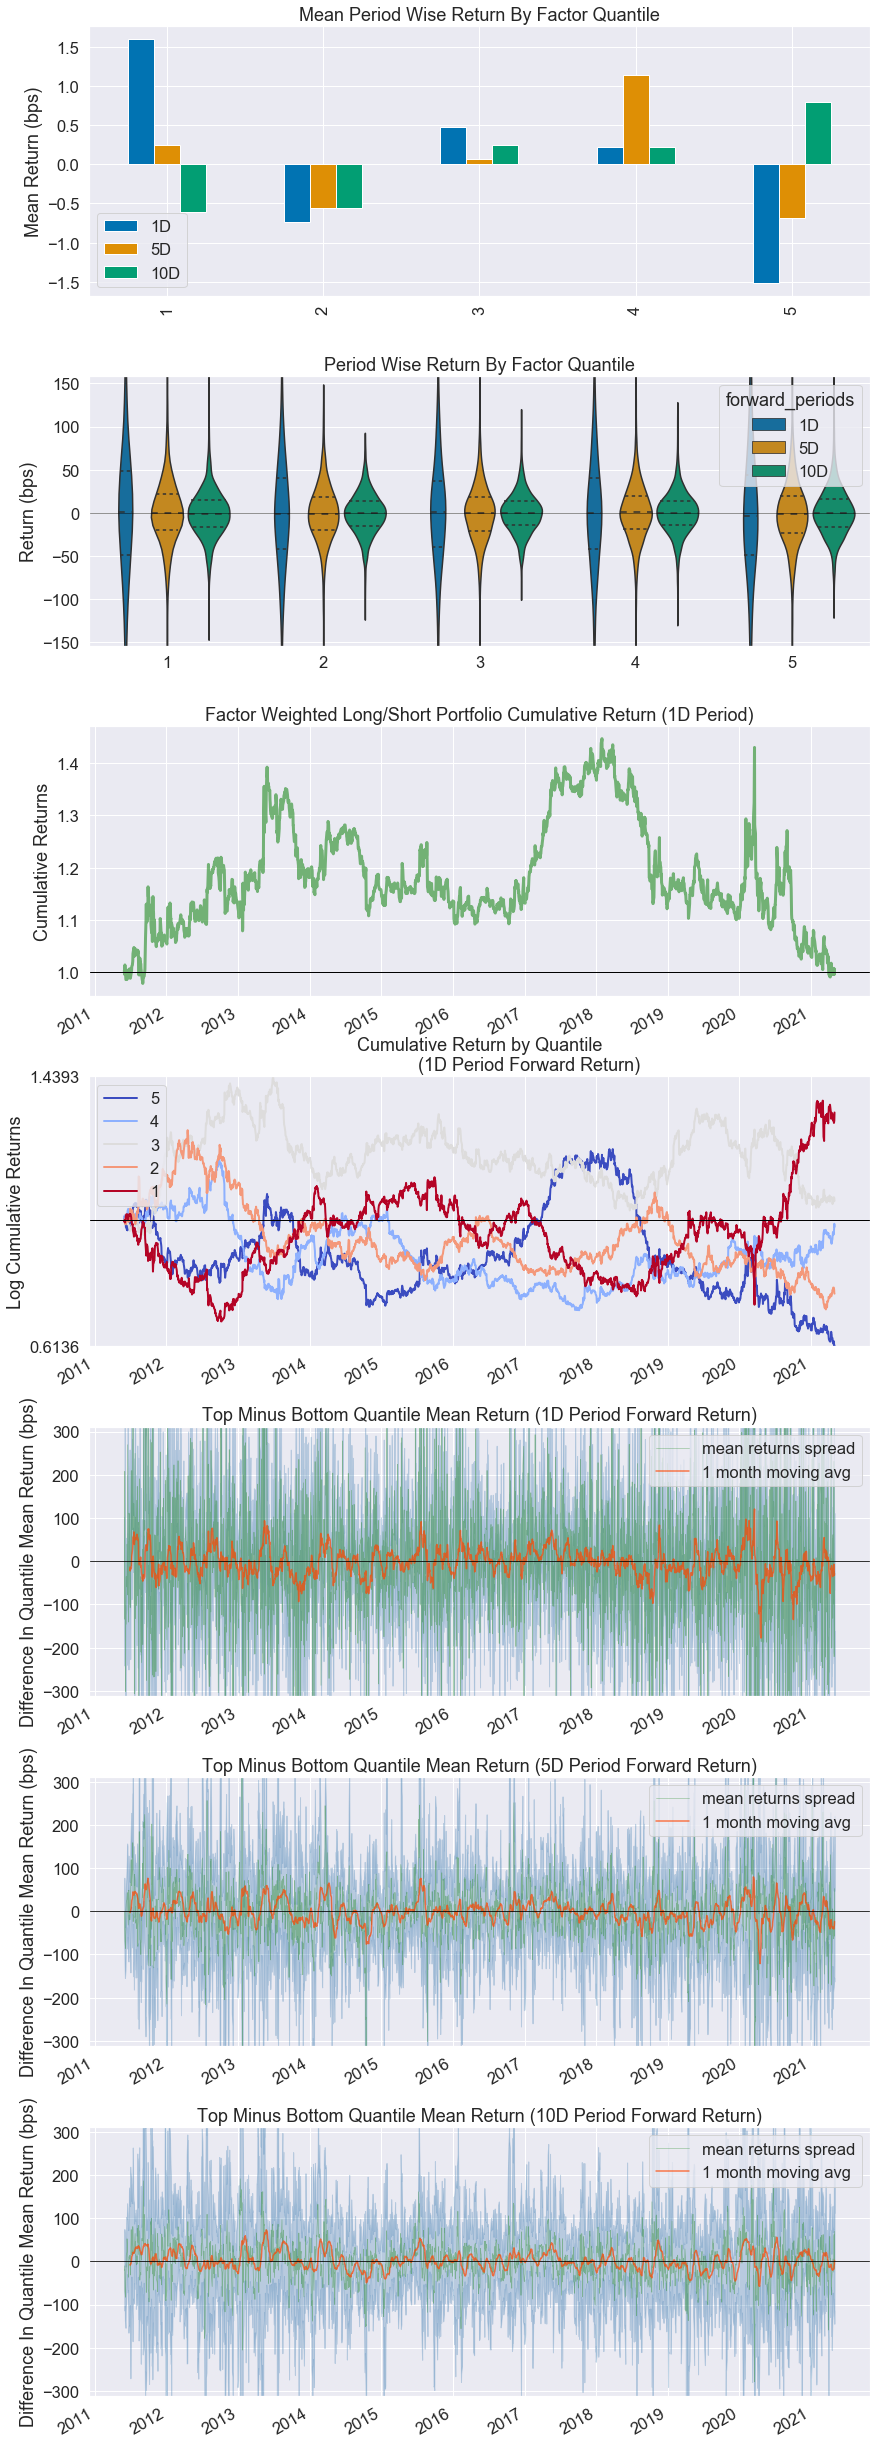

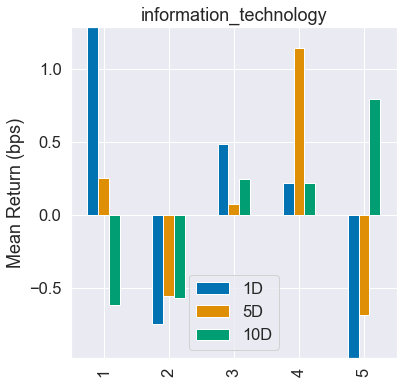

Information Analysis


,1D,5D,10D
IC Mean,-0.010,-0.004,0.001
IC Std.,0.290,0.291,0.288
Risk-Adjusted IC,-0.034,-0.012,0.004
t-stat(IC),-1.723,-0.609,0.197
p-value(IC),0.085,0.543,0.844
IC Skew,-0.002,-0.011,-0.073
IC Kurtosis,-0.436,-0.270,-0.268


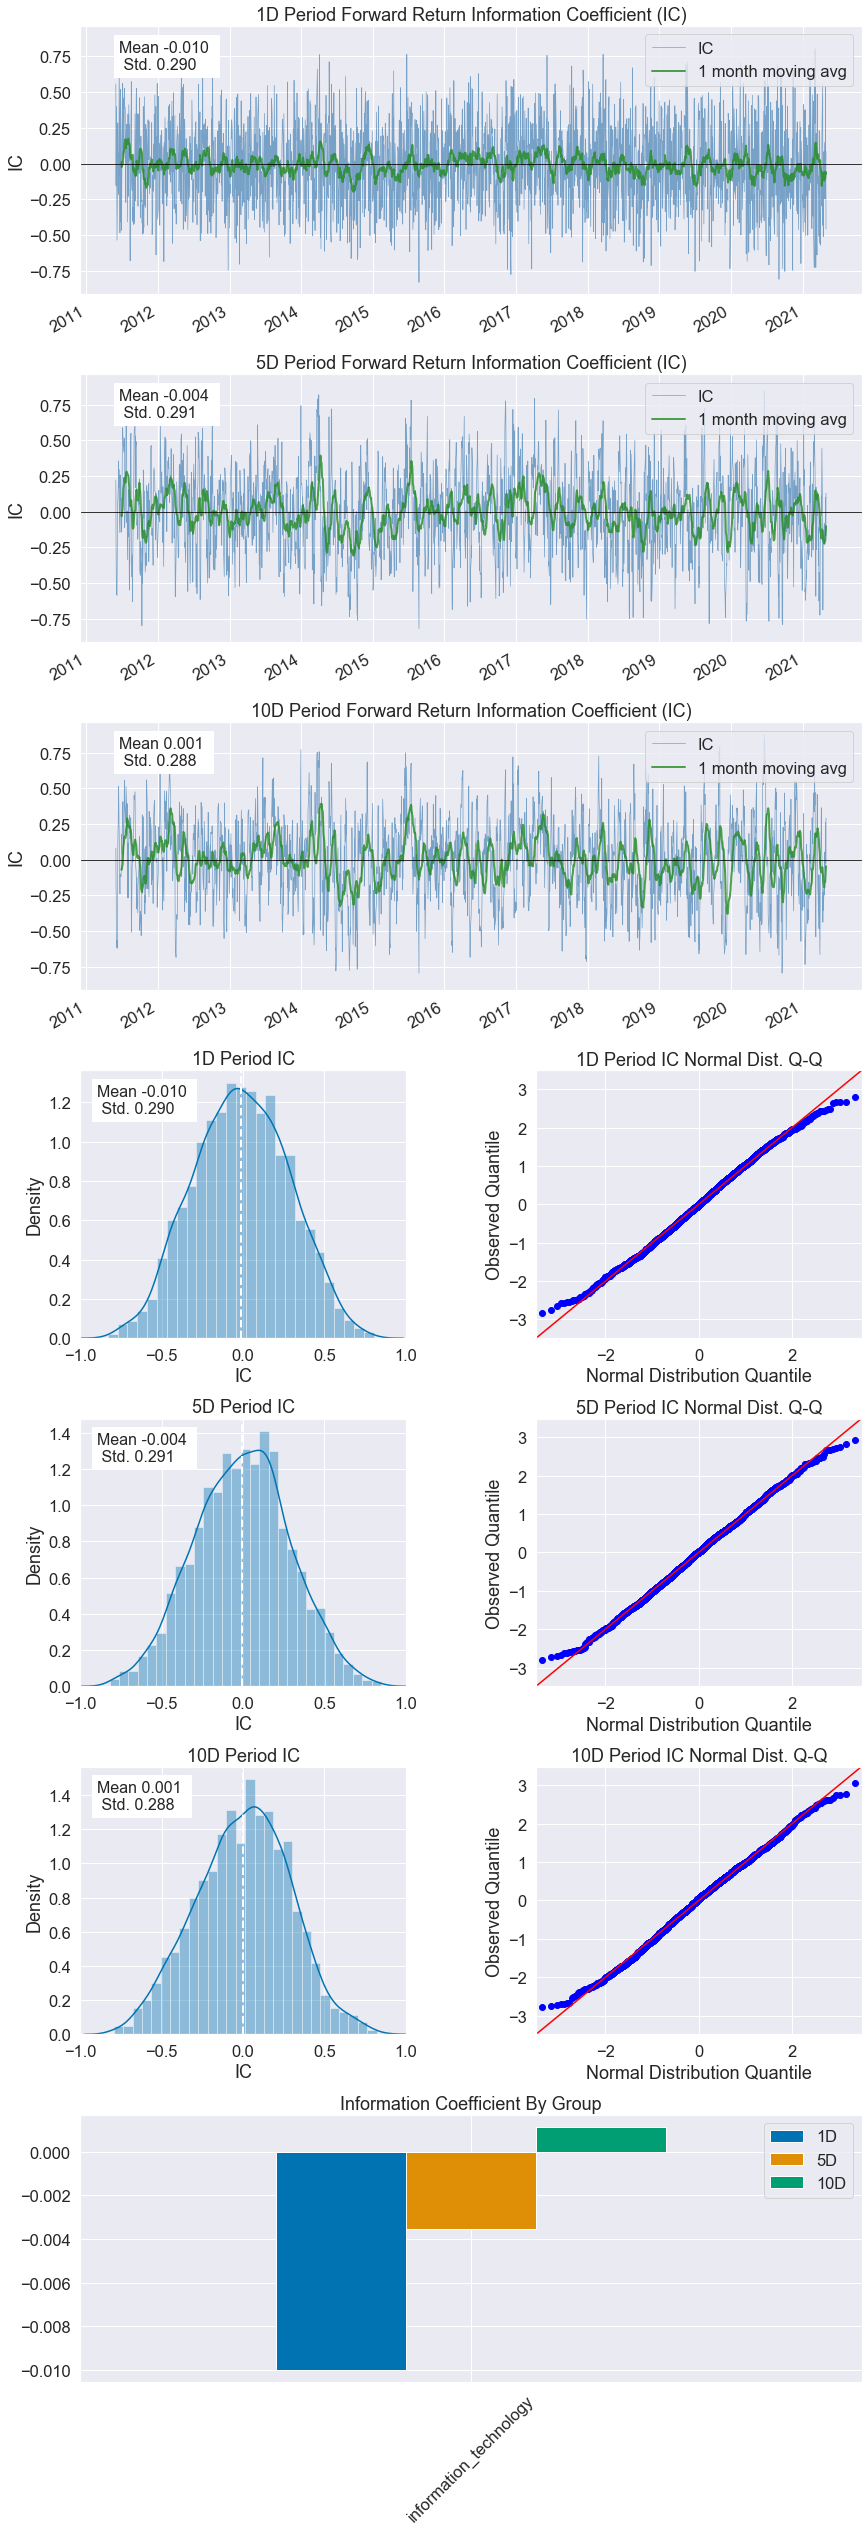

AttributeError: 'Index' object has no attribute 'get_values'

In [9]:
alphalens.tears.create_full_tear_sheet(non_predictive_factor_data, by_group=True)

## Alphalens on predictive factors

In [10]:
predictive_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor, 
                                                                              pricing, 
                                                                              quantiles=5,
                                                                              bins=None,
                                                                              groupby=ticker_sector,
                                                                              groupby_labels=sector_names)

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.392377,0.071429,-0.036205,0.039967,10028,21.410881
2,-0.196885,0.105594,-0.008645,0.026130,8989,19.192501
3,-0.166922,0.114754,0.003603,0.024908,8803,18.795371
4,-0.143444,0.151456,0.016320,0.026390,8988,19.190366
5,-0.125094,0.786163,0.048676,0.050018,10028,21.410881


Returns Analysis


,1D,5D,10D
Ann. alpha,10.118,9.104,2.161
beta,0.108,0.153,0.172
Mean Period Wise Return Top Quantile (bps),88.553,86.349,43.183
Mean Period Wise Return Bottom Quantile (bps),-85.632,-83.284,-41.755
Mean Period Wise Spread (bps),174.185,169.567,84.877


<Figure size 432x288 with 0 Axes>

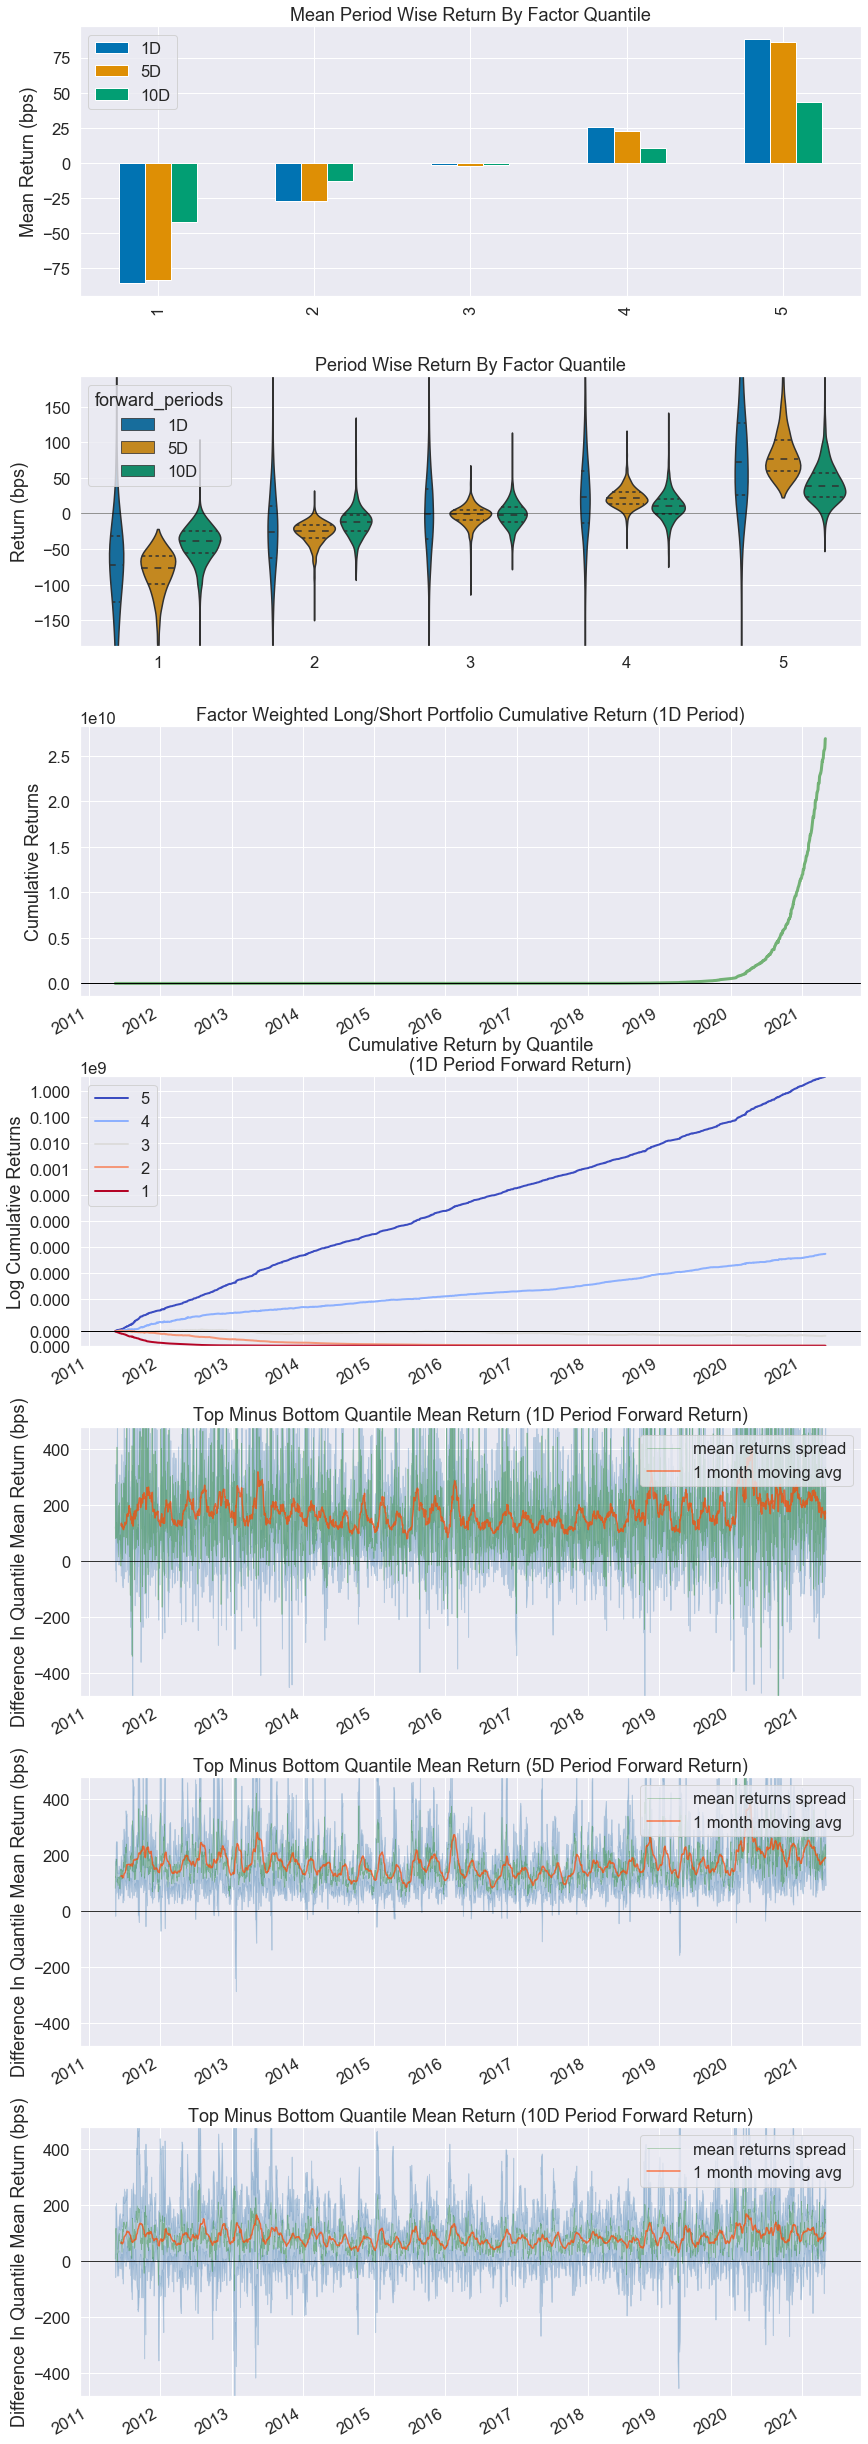

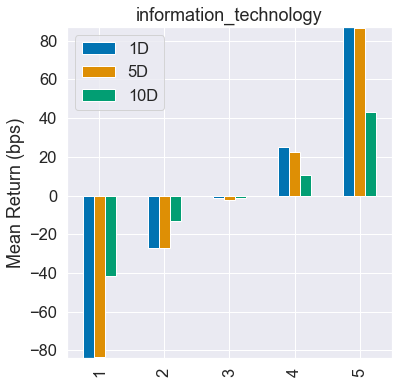

Information Analysis


,1D,5D,10D
IC Mean,0.384,1.000000e+00,0.637
IC Std.,0.255,0.000000e+00,0.198
Risk-Adjusted IC,1.504,2.603273e+17,3.219
t-stat(IC),75.296,1.303457e+19,161.197
p-value(IC),0.000,0.000000e+00,0.000
IC Skew,-0.492,-2.890800e+01,-0.931
IC Kurtosis,0.235,8.326670e+02,1.061


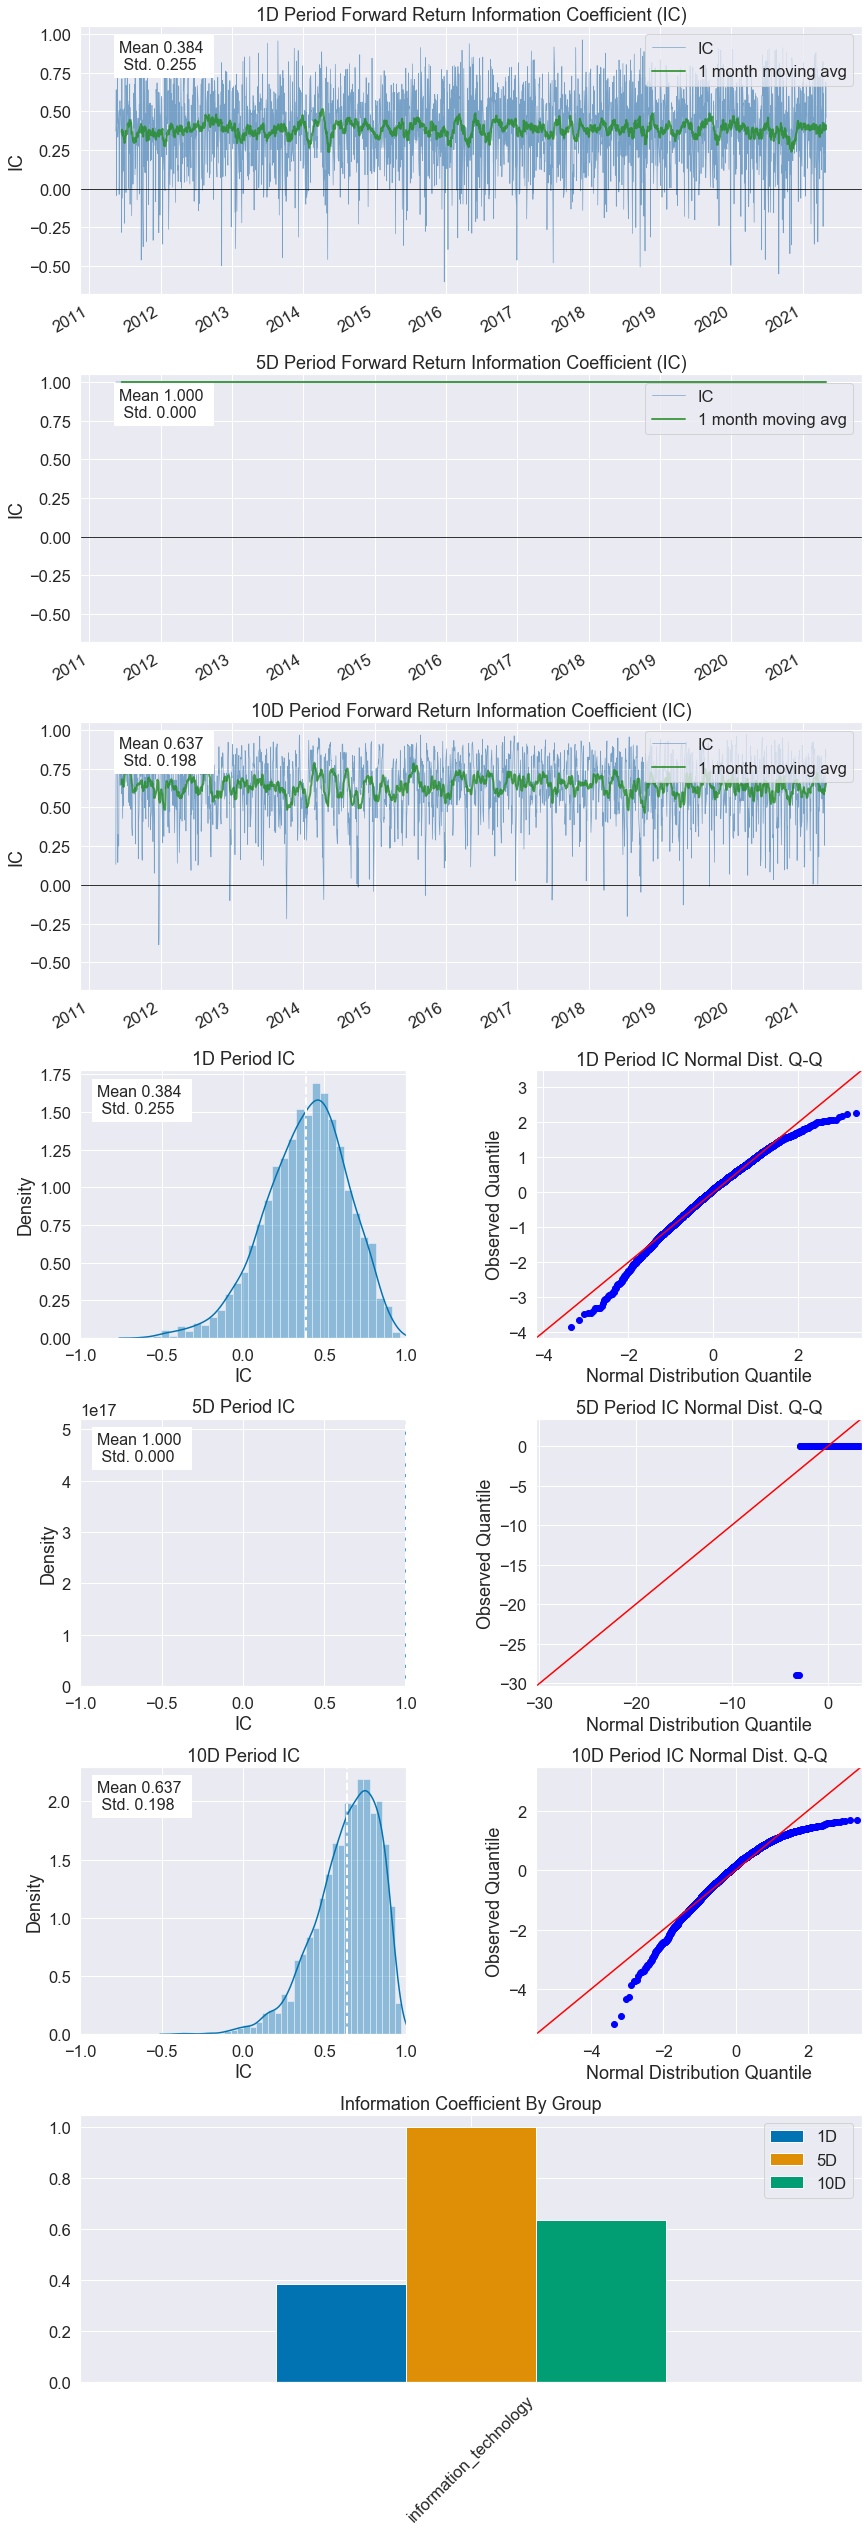

AttributeError: 'Index' object has no attribute 'get_values'

In [11]:
alphalens.tears.create_full_tear_sheet(predictive_factor_data, by_group=True)

## Events style returns analysis- non predictive

<Figure size 432x288 with 0 Axes>

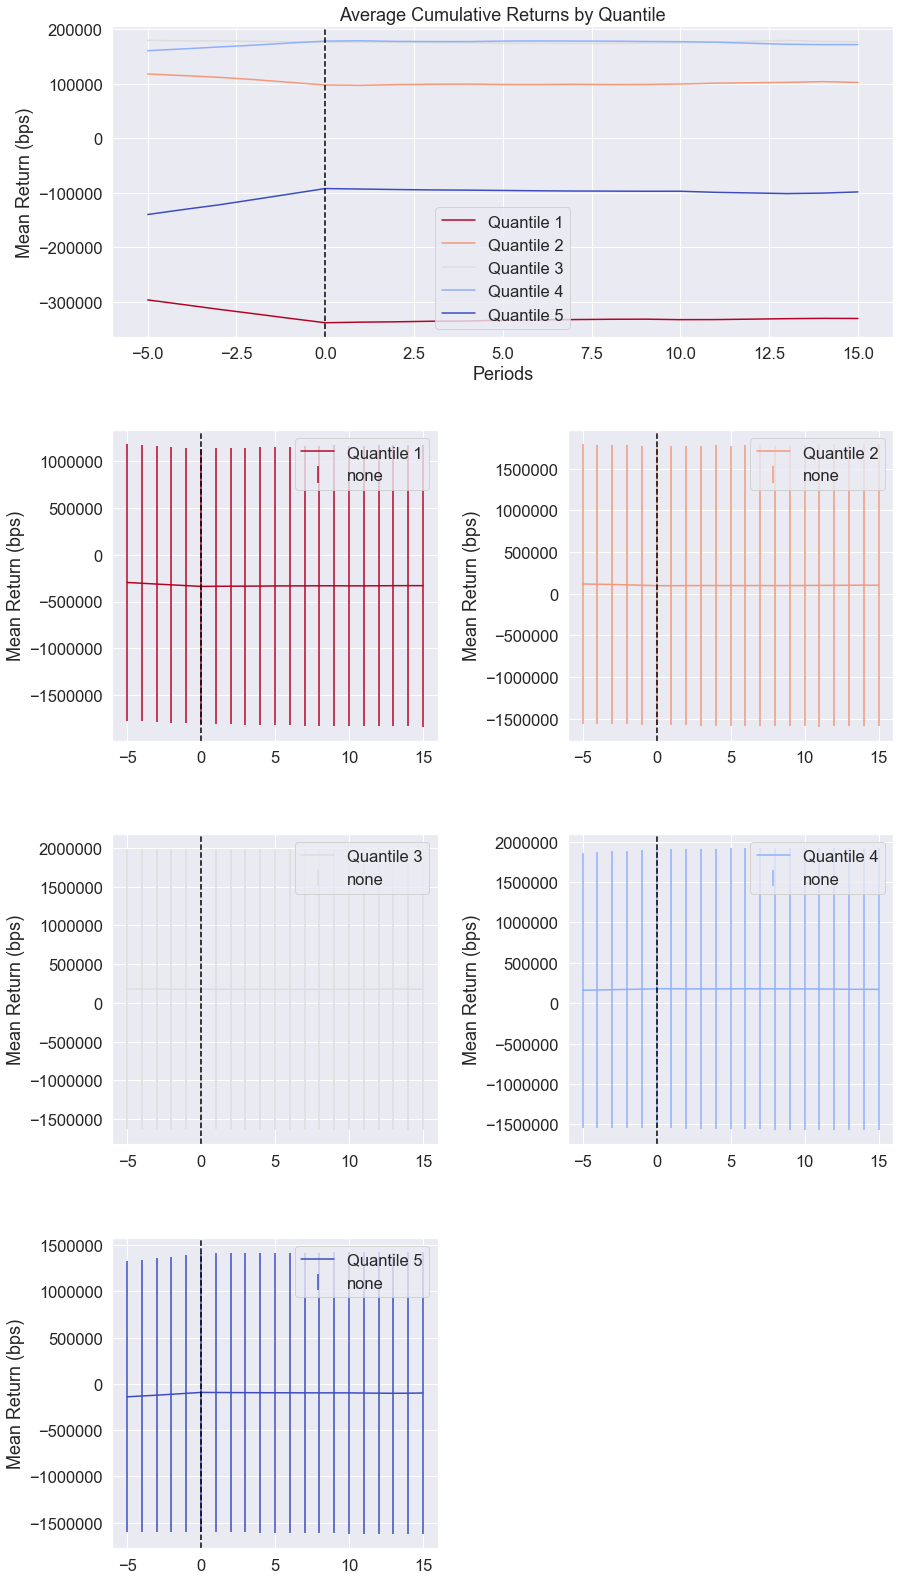

In [12]:
alphalens.tears.create_event_returns_tear_sheet(non_predictive_factor_data, pricing)

## Events style returns analysis- predictive

<Figure size 432x288 with 0 Axes>

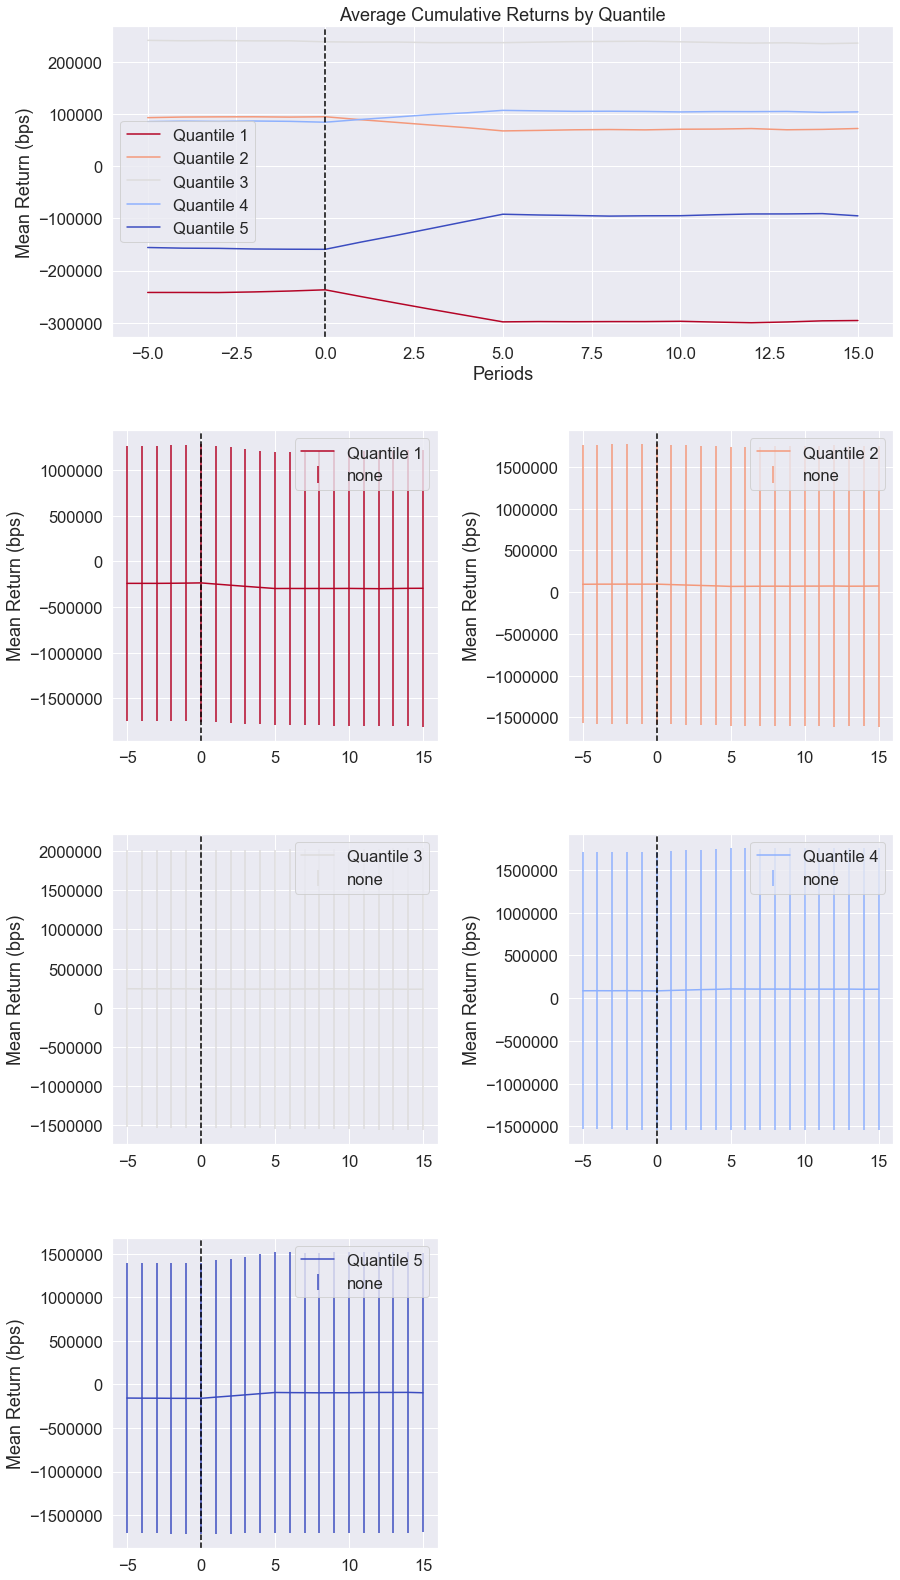

In [13]:
alphalens.tears.create_event_returns_tear_sheet(predictive_factor_data, pricing)